<a href="https://colab.research.google.com/github/junggeyy/DeepLearning/blob/main/mlp_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptron for Regression

.view(-1, 1) specifies the target shape for tensor. In our case, '-1' is a placeholder that Pytorch automatically calculates to determine the number of rows needed. '1' indicates the required shape of column, which is 1. So, after this operation, X_train is reshaped into 2D tensor with 10 rows and 1 column.

In [1]:
import torch

X_train = torch.tensor(
    [258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]
  ).view(-1, 1)

y_train = torch.tensor(
    [236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8]
  )

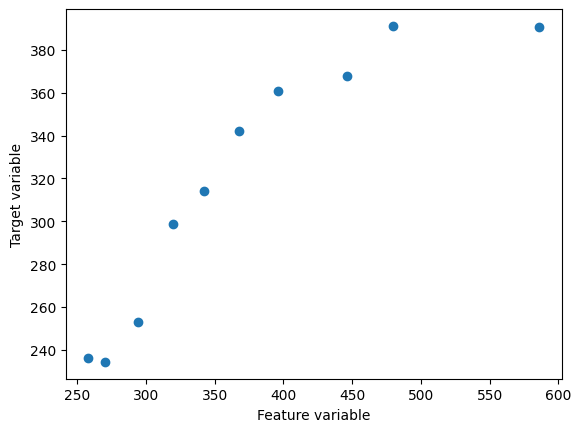

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.xlabel("Feature variable")
plt.ylabel("Target variable")
plt.show()

In [7]:
class RegressionMLP(torch.nn.Module):

  def __init__(self, num_features):
    super().__init__()

    self.all_layers = torch.nn.Sequential(
        torch.nn.Linear(num_features, 50),
        torch.nn.ReLU(),

        torch.nn.Linear(50, 25),
        torch.nn.ReLU(),

        torch.nn.Linear(25, 1),
    )

  def forward(self, x):
    logits = self.all_layers(x).flatten()
    return logits

Normalizing the dataset

In [4]:
x_mean, x_std = X_train.mean(), X_train.std()
y_mean, y_std = y_train.mean(), y_train.std()

X_train_norm = (X_train - x_mean) / x_std
y_train_norm = (y_train - y_mean) / y_std

In [8]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):

  def __init__(self, X, y):
    self.features = X
    self.targets = y

  def __getitem__(self, index):
    return self.features[index], self.targets[index]

  def __len__(self):
    return self.targets.shape[0]

train_ds = MyDataset(X_train_norm, y_train_norm)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=20,
    shuffle=True
)

In [ ]:
import torch.nn.functional as F

torch.manual_seed(1)

model = RegressionMLP(num_features=1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

num_epochs = 30

for epoch in range(num_epochs):
  model = model.train()
  for batch_idx, (features, targets) in enumerate(train_loader):

    logits = model(features)
    loss = F.mse_loss(logits, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if not batch_idx % 250:
      print(f'Epoch {epoch+1:03d}/{num_epochs:03d}'
      f' | Batch {batch_idx:03d}/{len(train_loader):03d}'
      f' | Loss : {loss:.2f}')

## Evaluating the model

In [10]:
model.eval()

X_range = torch.arange(150, 800, 0.1).view(-1, 1)
X_range_norm = (X_range - x_mean) / x_std

with torch.no_grad():
    y_mlp_norm = model(X_range_norm)

# our model returns normalized predictions
# undo normalization of preditions for plotting
y_mlp = y_mlp_norm * y_std + y_mean

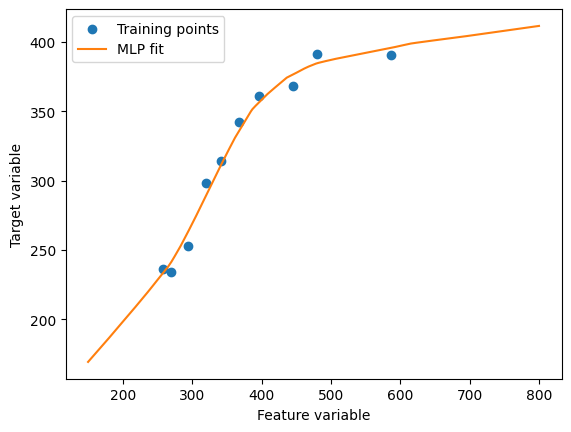

In [11]:
plt.scatter(X_train, y_train, label="Training points")
plt.plot(X_range, y_mlp, color="C1", label="MLP fit", linestyle="-")


plt.xlabel("Feature variable")
plt.ylabel("Target variable")
plt.legend()
plt.show()